In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [7]:
import os
import csv
import numpy as np

In [6]:
ACTION_LABELS_PATH = os.path.join('../action_recognition/action_labels.csv')
feature_map = {}
with open(ACTION_LABELS_PATH) as f:
    csv_reader = csv.reader(f, delimiter=",")
    feature_map = {each[1]: each[0] for each in csv_reader}

feature_map

{'hello': '0', 'thank you': '1', 'help': '2'}

In [57]:
import csv
al = []
with open("action_labels.csv", 'r') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        al.append(row)
al

[['0', 'hello'],
 ['1', 'good/thank you'],
 ['2', 'help'],
 ['3', 'I/me'],
 ['4', 'please'],
 ['5', 'sorry'],
 ['6', 'welcome'],
 ['7', 'welcome'],
 ['8', 'ok'],
 ['9', 'what'],
 ['10', 'what'],
 ['11', 'can'],
 ['12', 'thank you very much'],
 ['13', 'deaf'],
 ['14', 'do not'],
 ['15', 'feel'],
 ['16', 'eat/food'],
 ['17', 'eat a lot'],
 ['18', 'tired'],
 ['19', 'because'],
 ['20', 'sick'],
 ['21', 'drink'],
 ['22', 'drink'],
 ['23', 'apple'],
 ['24', 'banana'],
 ['25', 'drive'],
 ['26', 'again'],
 ['27', 'also'],
 ['28', 'ask'],
 ['29', 'yes'],
 ['30', 'no'],
 ['31', 'man'],
 ['32', 'man'],
 ['33', 'woman'],
 ['34', 'woman'],
 ['35', 'he/she'],
 ['36', 'bad'],
 ['37', 'have/has/had'],
 ['38', 'have/has/had'],
 ['39', 'when'],
 ['40', 'where'],
 ['41', 'which'],
 ['42', 'who'],
 ['43', 'why'],
 ['44', 'how'],
 ['45', 'you'],
 ['46', 'boy'],
 ['47', 'girl'],
 ['48', 'friend'],
 ['49', 'finish/complete'],
 ['50', 'find'],
 ['51', 'other'],
 ['52', 'forget'],
 ['53', 'give'],
 ['54', 'giv

In [1]:

from main import ActionRecognitionModule
x = ActionRecognitionModule()

In [4]:
x.action_labels[100]

'store/shop'

In [14]:
for layer in x.model.layers:
    print(layer.input_shape)

(None, 20, 240)
(None, 20, 192)
(None, 20, 256)
(None, 224)
(None, 192)
(None, 160)


In [47]:
import numpy as np
from time import time
d = np.random.rand(20, 240)
d.shape

(20, 240)

In [48]:
out = x.model.predict(
    np.expand_dims(d, axis=0),
    verbose=1,
    workers=4, 
    use_multiprocessing=True
)

1/1 [==============================] - 0s 29ms/step


In [49]:
np.argmax(out)

21

In [50]:
outputs = [0 for _ in range(122)]
for i in range(1000):
    d = np.random.rand(20, 240)
    out = x.model.predict(
        np.expand_dims(d, axis=0), verbose=0, workers=4, use_multiprocessing=True
    )
    outputs[np.argmax(out)] += 1

1/1 [==============================] - 0s 29ms/step


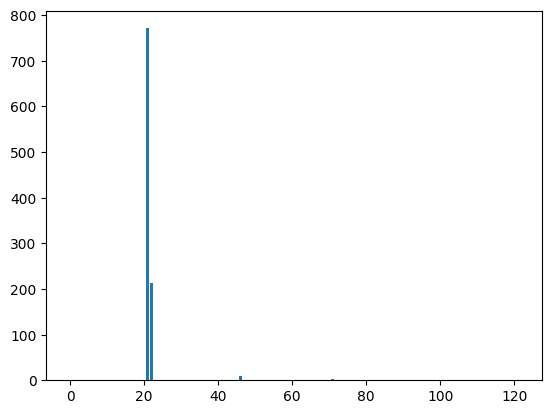

In [51]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(len(outputs))], outputs )
plt.show()


In [13]:
from collections import deque
q = deque(maxlen=3)

q.append(1)
print(q)
q.append(2)
print(q)
q.append(3)
print(q)

q.append(4)
print(q)
q.append(4)
print(q)
q.append(4)
print(len(q))

deque([1], maxlen=3)
deque([1, 2], maxlen=3)
deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)
deque([3, 4, 4], maxlen=3)
3


In [15]:
import numpy as np
np.array(q)

array([4, 4, 4])